**Mentör:**      Onur GÜNGÖR (Ona buradan tekrar teşekkür ediyoruz projenin her adımında bizimile ilgilendiği için :))

Grup Üyeleri:Soru ve önerileriniz için her zaman iletişime geçebilirsiniz.
*   Mustafa ALTUNTAŞ mustafasah45@gmail.com,  linkedin.com/in/mstf-altun

*   Ceylan OPUZ ceylanopuz07@gmail.com

*   Leyla BEDER  leylaabeder@gmail.com

*   Mustafa İLKEN  mustafailken@gmail.com

*   Yunuz YAŞAR yunusy20@gmail.com


             


**VERİ SETİ:**
Veri setimiz Kadıköy Belediyesi'ne gelen iletilerden oluşmakta. Toplamda 16156 verimiz bulunmakta bu veriden yaklaşık 13.000 kadarı kullanılabilir halde(verilerin kullanılabilirliği işlem yapılacak konu için azalıp arta bilmekte). 

Projemizde yani sadece deep learning kısmını sayarsak bizi alakaden sütun Doküman Metin sütunuydu yani gelen iletilerin metinlerinin bulundğu sütün.

**PROJE İÇERİĞİ:** Kadıköy Belediyesi'nden alınan şikayet, öneri, talep ve teşekkür metinlerinin işlenip bundan sonraki süreçte belediyeye ileti geldiğinde ne kadar sürede işleneceğine karar vermesi ve bunu bildirmesi. 

**Bölümler**

**1. BÖLÜM:**   Verinin incelenmesi ve temizlenmesi:
Mustafa Altuntaş, Ceylan Opuz, Mustafa İlken


  *   Kullanılacak kütüphanelerin import edilmesi
  *   Verinin kullanılmaya hazır hale getirilmesi
  *   Cross validation yapılması



**2. BÖLÜM:**   Verilerin analiz edilip çizimlerinin yapılması:
Mustafa Altuntaş


  *   Kütüphanelerin import edilmesi
  *   Grafik çizimlerinin yapılması
  
  

**3. BÖLÜM:**   Makine öğrenmesi algoritmalarının kullanılması:
Mustafa Altuntaş


  *   Verilerin temizlenmesi ve input'un belirlenmesi(Sadece doküman metin sütununu kullandk çünkü bizden istenen gelen metinlerden bir çıkarımda bulunmamızdı)
  *   Output'un belirlenmesi(biz outputumuzu 4 sınıfa ayırdık bu bize daha sağlıklı sonuçlar elde etmemizi sağladı)
  *   Train ve test veri setlerimizi oluşturduk
  *   Makine öğrenmesi algoritmalarının kullanılması ve sonuçları.
  
  
  
**4. BÖLÜM:**   Deep Learning modelinin oluşturulması:
Mustafa Altuntaş, Ceylan Opuz, Mustafa İlken, Leyla BEDER


  *   Output sayısının belirlenmesi:Mustafa Altuntaş
  *   Veri setlerinin parçalanması:Mustafa Altuntaş
  *   Veri setlerinin şekillendirilmesi:Mustafa Altuntaş
  *   Veri setlerinin tsv dosyası şeklinde kaydedilmesi:Mustafa Altuntaş, Ceylan Opuz, Mustafa İlken
  *   Corpus yapısının oluşturulması:Mustafa Altuntaş, Ceylan Opuz, Mustafa İlken
  *   Embeddinglerin belirlenmesi:Mustafa Altuntaş, Ceylan Opuz, Mustafa İlken,Leyla BEDER
  *   Model parametrelerinin verilmesi ve eğitilmesi:Mustafa Altuntaş, Ceylan Opuz, Mustafa İlken
  *   El ile girlen metnin denemesinin yapılması:Mustafa Altuntaş, Ceylan Opuz, Mustafa İlken




**SONUÇ:**
Elde ettiğimiz sonuçlara göre deep learning modellerinde %71 varan başarıya sahibimiz. Başarının aslında düşük olmasının en büyük sebebi elimzdeki verilerden bu alana yönelik kullanabileceğimiz verinin az olması. Daha iyi bir veri seti ile elde edebileceğimiz başarı %90'ları hatta daha fazlası olabilir.


Ayrıca gelen iletinin kaç günde çözüleceği işaretlenip şikayetin veya talebin yerine getirilip getirilmemesine göre belediye çalışanlarını uyaran bir sistemde oluşturulabilir.

**1. BÖLÜM**

In [0]:
from google.colab import files #Veriyi kendi bilgisayarınızdan yüklemenizi sağar
uploaded = files.upload()

Saving EEVR_D-Evrak_iletisim_detay.xlsx to EEVR_D-Evrak_iletisim_detay.xlsx


  *Kütüphanelerin import edilmesi ve verinin okunması*

In [0]:
import pandas as pd
import numpy as np
df = pd.read_excel('EEVR_D-Evrak_iletisim_detay.xlsx')

  *Verinin temizlenmesi*

In [0]:
df = df.drop(columns={'Evrak Türü','Doküman Adres Pafta','Doküman Adres Ada','Doküman Adres Parsel','İşlem Yapılan Alt Konu','Doküman Yer Adresi'})
df = df.dropna(axis=0)
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(13610, 17)

  *Verinin hazırlanması*

**Cross validation yapabilmemiz için öncelikle verilerin sayısal değer haline getirilmesi gerekiyor**

**Bunun İçin LabelEncoder kütüphanesini kullanıyoruz**

In [0]:
from sklearn.preprocessing import LabelEncoder
feature_multiple = df.columns
feature_binary = []

le = LabelEncoder()

for i in feature_multiple:  
  df[i] = le.fit_transform(df[i])

**SEABORN KÜTÜPHANESİ:** ile çok güzel çizimler yapabiliriz buradada cross validationı göstermek için bu kütüphaneyi kullanıyoruz

**CROSS VALIDATION:** bize sütunlar arasındaki ilişkiyi gösteriyor ilişki 1.0'a yaklaştıkça iki sütun birbirine benzemektedir bu da o iki sütundan birinin kullanılması gerektiğini gösterir.

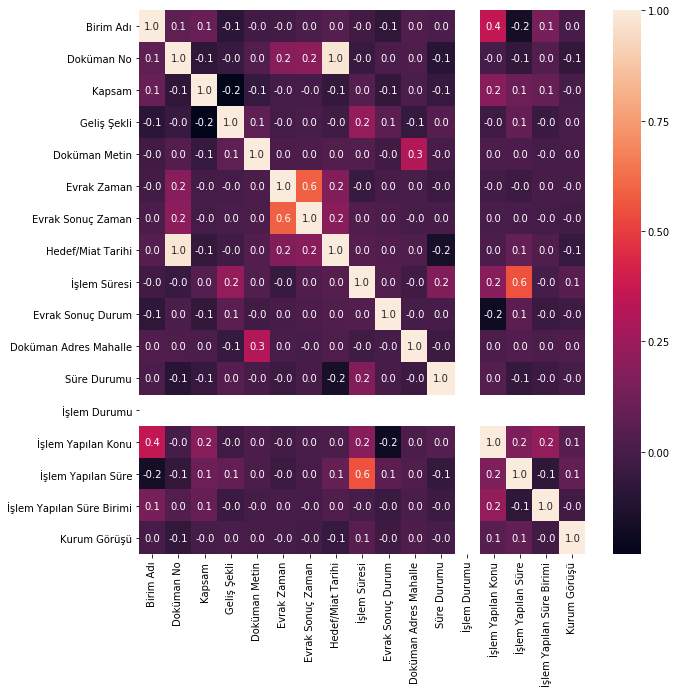

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

**2. BÖLÜM**

Veriyi tekrar okuyoruz çünkü bir önceki cross validation kısmında pek çok sütunu atmıştık ve değerlerin hepsini sayısal değere dönüştürmüştük. 

In [0]:
from collections import Counter
from wordcloud import WordCloud
df = pd.read_excel('EEVR_D-Evrak_iletisim_detay.xlsx')

In [0]:
df = df.drop(columns={'Evrak Türü','Doküman Adres Pafta','Doküman Adres Ada','Doküman Adres Parsel','Doküman Yer Adresi','İşlem Yapılan Alt Konu'})
df = df.dropna(axis=0)
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [0]:
sayi = df['İşlem Süresi'].count() #for döngüsü için kaç tane değer olduğunu aldık
time = [df['İşlem Süresi'][i][-18:-16] for i in range(sayi)] #İşlem Süresi kolonundaki değerlerin sadece gün sayılarını aldık

df['İşlem Süresi'] = time

**Belediyeye gelen iletilerin büyük çoğunluğunu şikayetler oluşturuyor bunun sebepleri:**


1.   Kadıköy belediyesinin kötü çalıştığı için değil bence şöyleki insanlar teşekkür etmek için zaman harcamazlar bir şikayetleri var ise onu dillendirirler.
2.   Ayrıca görüldüğü gibi öneri buradaki en az kısımlardan birisi bu çok kötü birşey aslında çünkü her zaman olduğu gibi biz bir şeylerin olmasını bekleyip sonra ders çıkaran bir topluluk haline geldik...



[9954, 2545, 35, 1010, 66]


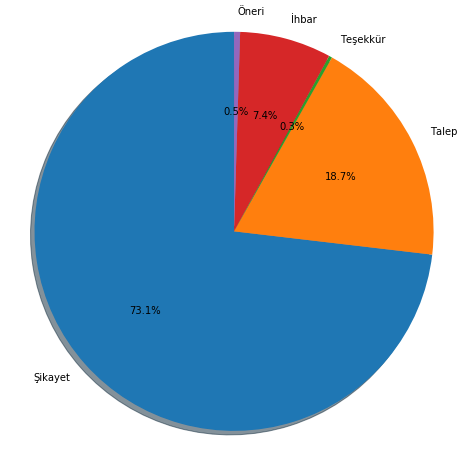

In [0]:
plt.figure(figsize=(8,8))    #Çizimimizin boyutunu belirliyoruz

#Dilimlerin isimlerini belirliyoruz
labels = 'Şikayet', 'Talep','Teşekkür','İhbar', 'Öneri'

size_kapsam = []    
for i in labels:
    size_kapsam.append(len(df[df['Kapsam']==i]))#kapsam sütunundaki her bir değerin sayısı

print(size_kapsam)
    

explode = (0, 0,0,0,0)  #burada hangi dilimin dışa doğru çıkması gerektiğini belirliyoruz(şimdilik hiç birini seçmedik)
                               
plt.pie(size_kapsam, explode = explode, labels=labels,  
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [0]:
year = []
j=0
for i in df[df['Kapsam']=='Şikayet']['Evrak Zaman']:
  year.append(i.split(' '))   
  year[j] = year[j][0].split('/')
  year[j] = year[j][1]
  j+=1

a = Counter(year).keys() # equals to list(set(words))
b = Counter(year).values() # counts the elements' frequency
print(a,b)

dict_keys(['01', '02', '03', '04', '05', '07', '06', '08']) dict_values([1585, 1592, 1739, 1377, 1628, 1842, 114, 77])


**Aylara Göre Şikayet Sayıları:**
*Bana kalırsa grafik gayet normal az biraz iniş ve çıkışlar olmuş taki haziran ayına kadar bence belediye haziran ayından sonra mükemmel bir çalışma göstermiş olmaz yani bu derece bir çalışma pek mümkün değil büyük ihtimalle haziran ayından sonra belediyeye gelen ileti sisteminde bir bozukluk olmuş olabilir.*

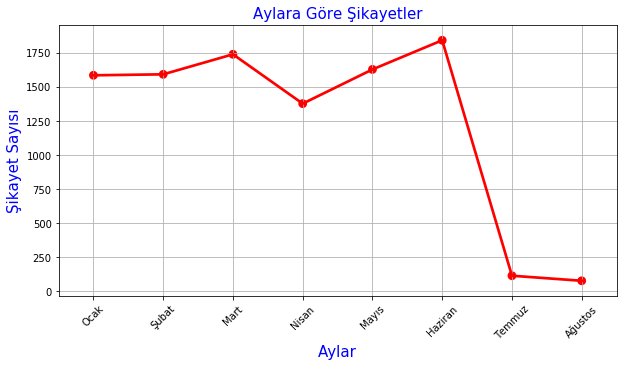

In [0]:
x= ['Ocak','Şubat','Mart','Nisan','Mayıs','Haziran','Temmuz','Ağustos']
y=[1585, 1592, 1739, 1377, 1628, 1842, 114, 77]

plt.figure(figsize=(10,5))
sns.pointplot(x = x,y = y,color='red',alpha=0.8)
plt.xlabel('Aylar',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Şikayet Sayısı',fontsize = 15,color='blue')
plt.title('Aylara Göre Şikayetler',fontsize = 15,color='blue')
plt.grid()
plt.show()

**Aşşağıdaki tabloda görüldüğü gibi Caferağa Mahallesi diğer mahallelere göre daha fazla şikayette bulunmuş bunun sebepleri şunlar olabilir:**



1.   Caferağa Mahallesinin nüfusunun fazla olması.
2.   Caferağa Mahallesi diğer mahallelere göre daha sıkıntılı bir yer olabilir.
3.   Caferağa Mahallesindeki vatandaşların daha duyarlı olması olabilir



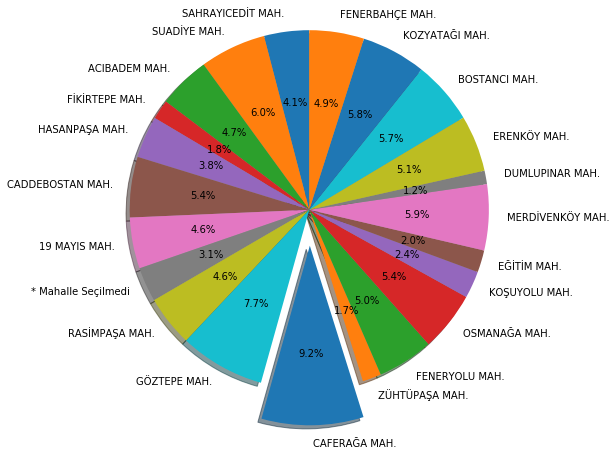

In [0]:
plt.figure(figsize=(8,8))  


labels = df['Doküman Adres Mahalle'].unique()

size_kapsam = []    
for i in labels:
    size_kapsam.append(len(df[(df['Kapsam']=='Şikayet')&(df['Doküman Adres Mahalle']==i)]))
    

explode = (0, 0,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0,0,0,0,0,0,0)  #Mesela burada 11. dilimin dışarı doğru çıkmasını söyledik
                               
plt.pie(size_kapsam, explode = explode, labels=labels,  
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**Burada wordcloud yaptım aslında pek yorumlanacak bir şey değil ama güzel bir görüntü oluşturuyor elinizdeki veriler ile**

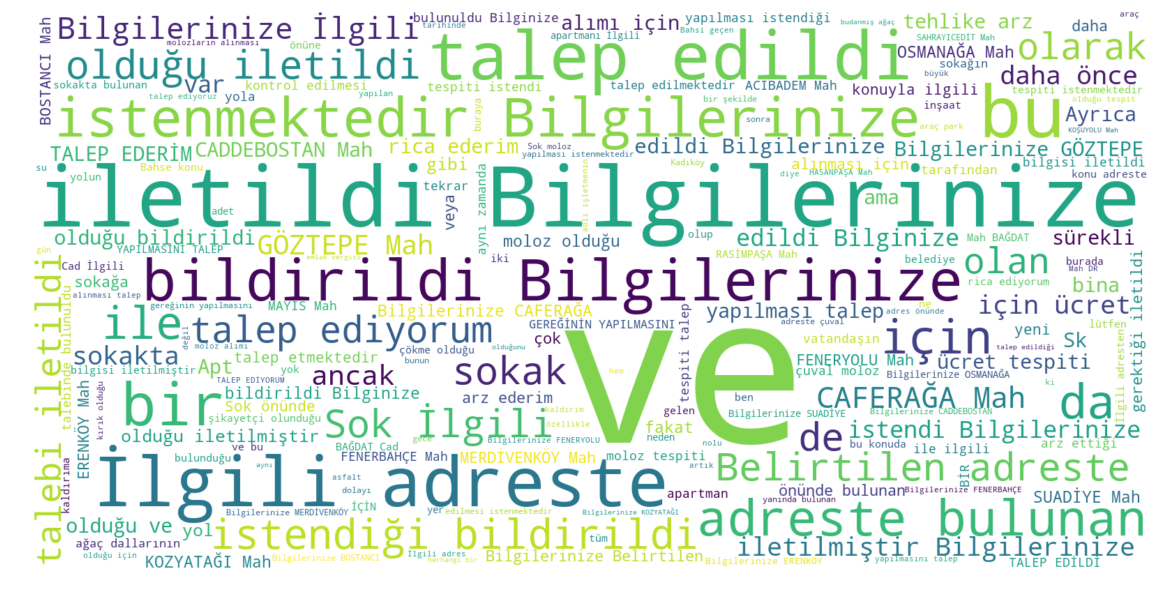

In [0]:
text = []
for i in df['Doküman Metin']:
    text.append(i)#burada kelimeleri textin içerisine ekliyoruz ve bunlar şu şekilde arraylar oluyorlar ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Şimdi array deki her bir kelimeyi birleştirip bu şekle geitiriyoruz [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**3. BÖLÜM**

In [0]:
df = pd.read_excel('EEVR_D-Evrak_iletisim_detay.xlsx')

In [0]:
df = df.drop(columns={'Birim Adı','Evrak Türü','Doküman No','Kapsam','Geliş Şekli','Evrak Zaman','Evrak Sonuç Zaman','Hedef/Miat Tarihi','Evrak Sonuç Durum','Doküman Adres Pafta','Doküman Adres Mahalle','Doküman Adres Ada','Doküman Adres Parsel','Doküman Yer Adresi','Süre Durumu','İşlem Durumu','İşlem Yapılan Konu','İşlem Yapılan Alt Konu','İşlem Yapılan Süre','İşlem Yapılan Süre Birimi','Kurum Görüşü'})
df = df.dropna(axis=0)
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(13711, 2)

In [0]:
sayi = df['İşlem Süresi'].count() #for döngüsü için kaç tane değer olduğunu aldık
time = [df['İşlem Süresi'][i][-18:-16] for i in range(sayi)] #İşlem Süresi kolonundaki değerlerin sadece gün sayılarını aldık

df['İşlem Süresi'] = time

**Burada Outputumuzu 4 sınıfa ayırdık bunun bize olan faydaları:**


1.   Daha doğru sonuçlar elde etmek
2.   Daha az işlem yapılması ve daha hızlı sonuçlar elde edilmesi



In [0]:
for i in range(len(df['İşlem Süresi'])):
  if int(df['İşlem Süresi'][i]) < 1:
    df['İşlem Süresi'][i] = '1'
    
  elif int(df['İşlem Süresi'][i]) < 4 and int(df['İşlem Süresi'][i]) >= 1:
    df['İşlem Süresi'][i] = '3'
    
  elif int(df['İşlem Süresi'][i]) <= 10 and int(df['İşlem Süresi'][i]) >= 4:
    df['İşlem Süresi'][i] = '5'
  
  else:
    df['İşlem Süresi'][i] = '10'

**Train Test:** Veriyi train ve test diye ikiye ayırıyoruz çünkü makine öğrenirken aynı zamanda ezber yapar ve cevabını bildiği soruları sorarsanız çok iyi sonuçlar elde edersiniz ama gerçekte o kadar başarılı olmazsınız bu bizim başarımızı ölçmemizi sağlıyor.

**Vectorizer:** Kelimeleri makineye vermeden önce vektörize ediyoruz çünkü makine kelimeleri sadece vektörler şeklindeyken anlamlandıra biliyor.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

sentences = df['Doküman Metin'].values
y = df['İşlem Süresi'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

**Algoritmaların kullanılması:** Pek çok farklı algoritma kullanabilirsiniz ve bazıları çok iyi sonuç verirken bazıları ise çok kötü sonuçlar verebilir. Burada önemli olan algoritmaların kullanılacağı yerleri iyi bilmek.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)


classifier_r = RandomForestClassifier()
classifier_r.fit(X_train, y_train)
score_r = classifier_r.score(X_test, y_test)

classifier_b = xgb.XGBClassifier(seed = 82)
classifier_b.fit(X_train, y_train)
score_b = classifier_b.score(X_test, y_test)

print("Accuracy:", score)

print("Logistic Regression başarı:", score, "\nRandom Forest Classifier başarı:" ,score_r, "\nxgb başarı:",score_b)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.528879813302217
Logistic Regression başarı: 0.528879813302217 
Random Forest Classifier başarı: 0.49795799299883314 
xgb başarı: 0.5157526254375729


**4. BÖLÜM**

In [0]:
df = pd.read_excel('EEVR_D-Evrak_iletisim_detay.xlsx')

df = df.drop(columns={'Birim Adı','Evrak Türü','Doküman No','Kapsam','Geliş Şekli','Evrak Zaman','Evrak Sonuç Zaman','Hedef/Miat Tarihi','Evrak Sonuç Durum','Doküman Adres Pafta','Doküman Adres Mahalle','Doküman Adres Ada','Doküman Adres Parsel','Doküman Yer Adresi','Süre Durumu','İşlem Durumu','İşlem Yapılan Konu','İşlem Yapılan Alt Konu','İşlem Yapılan Süre','İşlem Yapılan Süre Birimi','Kurum Görüşü'})
df = df.dropna(axis=0)
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(13711, 2)

In [0]:
sayi = df['İşlem Süresi'].count() #for döngüsü için kaç tane değer olduğunu aldık
time = [df['İşlem Süresi'][i][-18:-16] for i in range(sayi)] #İşlem Süresi kolonundaki değerlerin sadece gün sayılarını aldık

df['İşlem Süresi'] = time

**Output sayısını 2 ye düşürdük 1 günden kısa sürenler ve uzun sürenler olarak**

In [0]:
for i in range(len(df['İşlem Süresi'])):
  if int(df['İşlem Süresi'][i]) <= 1:
    df['İşlem Süresi'][i] = 'a'
    
  elif int(df['İşlem Süresi'][i]) > 1:
    df['İşlem Süresi'][i] = 'b'
    
    #bu kısımda isterseniz output sayısını 4 e çıkarıp deneyebilirsiniz
#for i in range(len(df['İşlem Süresi'])):
#  if int(df['İşlem Süresi'][i]) < 1:
#    df['İşlem Süresi'][i] = 'a'
#    
#  elif int(df['İşlem Süresi'][i]) < 4 and int(df['İşlem Süresi'][i]) >= 1:
#    df['İşlem Süresi'][i] = 'b'
#    
#  elif int(df['İşlem Süresi'][i]) <= 7 and int(df['İşlem Süresi'][i]) >= 4:
#    df['İşlem Süresi'][i] = 'c'
#  
#  else:
#    df['İşlem Süresi'][i] = 'd'
    
print(df['İşlem Süresi'].value_counts().head(15))

b    7421
a    6290
Name: İşlem Süresi, dtype: int64


**File diye bir klasör açıyoruz çünkü ileride train, dev ve test datasetlerimizi buraya kaydedeceğiz**

In [0]:
import os
newpath = '/content/file' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

**Veri parçalama:**Verilerimizi 3 parçaya bölüyoruz train, dev ve test diye.
  
 **Train:** modelimizi eğitirken kullandığımız veri seti.
 
 **Test:** test bizim modelimizi test etmekte kullandığımız veri seti.
 
 **Dev:** Test data setinin öğrenme sırasındaki versiyonu gibi öğrenmede parametrelerin güncellenebilmesi için önemli.
 
 Ve verimizi karıştırıyoruz ki daha iyi sonuçlar elde edelim.

In [0]:
df = df.sample(frac=1)#karıştırma kısmı burada yapılıyor

train_df = df[:12000]
train_df = train_df.reset_index(drop=True)#indexleri sıfırlamaz isek sıkıntı çıkar
test_df = df[12000:13000]
test_df = test_df.reset_index(drop=True)
dev_df = df[13000:]
dev_df = dev_df.reset_index(drop=True)

**Burada neden böyle yaptığımızı sormayın öyle yaptık çünkü :) tabiki yinede sormak isterseniz bizimle iletişime geçmekten çekinmeyin**

In [0]:
train_df_bert = pd.DataFrame({
    'id':range(len(train_df)),
    'label':train_df['İşlem Süresi'],
    'alpha':['a']*train_df['İşlem Süresi'].shape[0],
    'text': train_df['Doküman Metin'].replace(r'\n|\r', ' ', regex=True)# train_df_bert diye yeni bir dataframe oluşturduk berte vermeden önce bu hale getirmemiz gerekiyormuş
})

dev_df_bert = pd.DataFrame({
    'id':range(len(dev_df)),
    'label':dev_df['İşlem Süresi'],
    'alpha':['a']*dev_df['İşlem Süresi'].shape[0],
    'text': dev_df['Doküman Metin'].replace(r'\n|\r', ' ', regex=True)# train_df_bert diye yeni bir dataframe oluşturduk berte vermeden önce bu hale getirmemiz gerekiyormuş
})

test_df_bert = pd.DataFrame({
    'id':range(len(test_df)),
    'label':test_df['İşlem Süresi'],
    'alpha':['a']*test_df['İşlem Süresi'].shape[0],
    'text': test_df['Doküman Metin'].replace(r'\n|\r', ' ', regex=True)# train_df_bert diye yeni bir dataframe oluşturduk berte vermeden önce bu hale getirmemiz gerekiyormuş
})

**Bu kısımda veri setlerimizi tsv dosyası şeklinde kaydettik sebebi:**

Mentörümüzün tavsiyesiydi sanırım tsv dosyları üzerinde model daha iyi eğitiliyor.

In [0]:
train_df_bert.to_csv('/content/file/train.tsv', index=False, sep="\t")
test_df_bert.to_csv('/content/file/test.tsv', index=False, sep="\t")
dev_df_bert.to_csv('/content/file/dev.tsv', index=False, sep="\t")

**Flair kütüphanesinin yüklenilmesi**

In [0]:
!pip install flair

     |████████████████████████████████| 184kB 48.4MB/s 
     |████████████████████████████████| 1.0MB 34.3MB/s 
     |████████████████████████████████| 778kB 50.5MB/s 
     |████████████████████████████████| 655kB 54.3MB/s 
     |████████████████████████████████| 798kB 54.6MB/s 
     |████████████████████████████████| 184kB 52.8MB/s 
     |████████████████████████████████| 337kB 52.4MB/s 
     |████████████████████████████████| 1.0MB 54.9MB/s 
     |████████████████████████████████| 808kB 56.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=1e57249d29fc7ef941e0f7dc6fd20884042b15b1f672de999168671240350212
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
  Created wheel for sqlitedict: filename=sqlitedict-1.6.0-cp36-none-any.whl size=14689 sha256=d830a1ec2ec7793e719dbdb5340f3cc6ae024d8a05c7543ddb8db358a9e68988
  Stored in directory: /root/.cache/pip/wheels/bd/57/d3/907c3ee02d35e6

**Corpus yapısının kendi verilerimiz ile oluşturulması**

In [0]:
from flair.data import Corpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from typing import List

# 1. corpusu import ediyoruz
from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus

# train test ve dev dosyalarının olduğu klasörü veriyoruz
data_folder = '/content/file'

# sütun isimleri ve kaçınca sırada oldukları
column_name_map = {3: "text", 1: "label"}


corpus: Corpus = CSVClassificationCorpus(data_folder,
                                         column_name_map,
                                         skip_header=True,
                                         delimiter='\t',    
                                         in_memory=True
                                        )  

2019-09-06 11:02:09,811 Reading data from /content/file
2019-09-06 11:02:09,812 Train: /content/file/train.tsv
2019-09-06 11:02:09,813 Dev: /content/file/dev.tsv
2019-09-06 11:02:09,813 Test: /content/file/test.tsv


In [0]:
# 2. label dictionary oluşturuyoruz
label_dictionary = corpus.make_label_dictionary()

2019-09-06 11:02:18,917 Computing label dictionary. Progress:


100%|██████████| 12000/12000 [00:00<00:00, 319472.71it/s]

2019-09-06 11:02:19,004 [b'a', b'b']


**Kullanabileceğiniz embeddingler ve bir kısmının karışık haldeki kodları :)) burada anlamadığınız yer olur ise yine benim ile iletişime geçebilirsiniz **

**Stack Embedding:**Stack embedding aslında iki embedding modelinin birleştirilmesinden başka bir şey değil.

In [0]:
# 3. kullanabileceğiniz embeddingler ve bir kısmının karışık haldeki kodları :)) 

from flair.embeddings import FlairEmbeddings, BertEmbeddings, FastTextEmbeddings, BytePairEmbeddings
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings

# init Flair embeddings
# flair_forward_embedding = FlairEmbeddings('multi-forward')
# flair_backward_embedding = FlairEmbeddings('multi-backward')

# init multilingual BERT

# bert_embedding = BertEmbeddings('bert-base-multilingual-cased')

#fasttext_embedding = FastTextEmbeddings('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tr.300.bin.gz', use_local=False)

#pair_embeddings: List[TokenEmbeddings] = [
#   BytePairEmbeddings('tr'),

#]

flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')
  
stacked_embeddings = StackedEmbeddings([
                                        BytePairEmbeddings('tr'),
#                                        flair_embedding_forward,
#                                        flair_embedding_backward,
                                        WordEmbeddings('tr-crawl')
                                       ])
  
  
##     WordEmbeddings('glove'),
#
#glove_embedding = WordEmbeddings('glove')
  
#flair_embedding_forward = FlairEmbeddings('news-forward')
#flair_embedding_backward = FlairEmbeddings('news-backward')

2019-09-06 11:02:19,973 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-forward--h2048-l1-d0.05-lr30-0.25-20/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmprn45ghyk


100%|██████████| 73034624/73034624 [00:09<00:00, 7873356.55B/s]

2019-09-06 11:02:30,277 copying /tmp/tmprn45ghyk to cache at /root/.flair/embeddings/news-forward-0.4.1.pt
2019-09-06 11:02:30,339 removing temp file /tmp/tmprn45ghyk


2019-09-06 11:02:38,066 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-backward--h2048-l1-d0.05-lr30-0.25-20/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpt69df6fm


100%|██████████| 73034575/73034575 [00:09<00:00, 7889835.18B/s]

2019-09-06 11:02:48,406 copying /tmp/tmpt69df6fm to cache at /root/.flair/embeddings/news-backward-0.4.1.pt
2019-09-06 11:02:48,494 removing temp file /tmp/tmpt69df6fm


downloading https://nlp.h-its.org/bpemb/tr/tr.wiki.bpe.vs100000.model


100%|██████████| 2094008/2094008 [00:01<00:00, 1111825.29B/s]


downloading https://nlp.h-its.org/bpemb/tr/tr.wiki.bpe.vs100000.d50.w2v.bin.tar.gz


100%|██████████| 19400720/19400720 [00:04<00:00, 4789844.50B/s]
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2019-09-06 11:02:59,641 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4/tr-crawl-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmp3dwu4mr6


100%|██████████| 1199998928/1199998928 [02:03<00:00, 9726626.58B/s]

2019-09-06 11:05:04,108 copying /tmp/tmp3dwu4mr6 to cache at /root/.flair/embeddings/tr-crawl-fasttext-300d-1M.vectors.npy


2019-09-06 11:05:10,988 removing temp file /tmp/tmp3dwu4mr6
2019-09-06 11:05:12,089 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4/tr-crawl-fasttext-300d-1M not found in cache, downloading to /tmp/tmprods0b6d


100%|██████████| 41935627/41935627 [00:05<00:00, 7240553.15B/s]

2019-09-06 11:05:18,903 copying /tmp/tmprods0b6d to cache at /root/.flair/embeddings/tr-crawl-fasttext-300d-1M
2019-09-06 11:05:18,941 removing temp file /tmp/tmprods0b6d


**Burada anlatılması gerek aslında çok fazla şey var ama sizlere epoch ve learning rate nedir onları özetleyeyim:**

**Epoch:** Epoch Türkçeye çağ diye çevriliyor bu ne demek derseniz verinin kaç defa öğrenileceğini gösteriyor da diyebiliriz en iyisi anlamak için epoch sayısnı değiştirip kendiniz görün

**Learnin Rate:** Learning rate öğrenme aralığı şöyle ki bir resmin her pikselinide teker teker inceleyebilirsiniz veya resmin bütününede bakabilirsiniz bütüne bakarken ayrıntıları kaçırabilirsiniz ayrıntılara bakarkende boğulabilirsiniz.


bu arada modelimiz epoch yaparken learning rate'i otomatik düşürmekte bu da 90 epoch dan sonrası için çok küçün learning rate hatası almanıza neden olabilir

In [0]:
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, DocumentRNNEmbeddings, DocumentPoolEmbeddings, DocumentLSTMEmbeddings
# document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
#                                                                      hidden_size=512,
#                                                                      reproject_words=True,
#                                                                      reproject_words_dimension=256,
#                                                                      )
# DocumentLSTMEmbeddings

#document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
#                                                                      hidden_size=512,
#                                                                      rnn_layers=2,
#                                      reproject_words=True,
#                                                                       reproject_words_dimension=256,
#                                                                      rnn_type='GRU',
#                                                                      bidirectional=False,
#                                                                      )
document_embeddings = DocumentPoolEmbeddings([stacked_embeddings])
#document_embeddings = DocumentPoolEmbeddings([stacked_embeddings], fine_tune_mode='nonlinear')
#document_embeddings = DocumentRNNEmbeddings([stacked_embeddings], rnn_type='LSTM')
  
# 5. create the text classifier
from flair.models import TextClassifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dictionary)

# 6. initialize the text classifier trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train('models/sikayet',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=80,
             monitor_train=True,
             monitor_test=True,
             anneal_with_restarts=True)

# 8. plot weight traces (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_weights('models/sikayet/weights.txt')

2019-09-06 11:43:39,180 ----------------------------------------------------------------------------------------------------
2019-09-06 11:43:39,182 Model: "TextClassifier(
  (document_embeddings): DocumentPoolEmbeddings(
    fine_tune_mode=linear, pooling=mean
    (embeddings): StackedEmbeddings(
      (list_embedding_0): StackedEmbeddings(
        (list_embedding_0): BytePairEmbeddings(model=bpe-tr-100000-50)
        (list_embedding_1): WordEmbeddings('tr-crawl')
      )
    )
    (embedding_flex): Linear(in_features=400, out_features=400, bias=False)
  )
  (decoder): Linear(in_features=400, out_features=2, bias=True)
  (loss_function): CrossEntropyLoss()
)"
2019-09-06 11:43:39,187 ----------------------------------------------------------------------------------------------------
2019-09-06 11:43:39,188 Corpus: "Corpus: 12000 train + 711 dev + 1000 test sentences"
2019-09-06 11:43:39,190 ------------------------------------------------------------------------------------------------

UnboundLocalError: ignored

<Figure size 432x288 with 0 Axes>

**Burada Sentece içine istediğiniz cümleyi yazıp deneme yapabilirsiniz**

In [0]:
from flair.data import Sentence
sentence = Sentence("çöpleri toplayın")

classifier.predict(sentence)
sentence.labels

[a (0.9555371403694153)]